## Pipeline

- 데이터 입력부터 모델까지의 흐름 -> 데이터(머신러닝) pipeline

azure machine learning

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
# ColumnTransformer : 조건문을 통해 column에 따라 분기
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [5]:
data = load_iris()
knn = KNeighborsClassifier()

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
pipe = Pipeline([('std',StandardScaler()),('KNN',KNeighborsClassifier())])

In [8]:
vars(pipe)

{'steps': [('std', StandardScaler()), ('KNN', KNeighborsClassifier())],
 'memory': None,
 'verbose': False}

In [9]:
pipe.fit(data.data, data.target)

Pipeline(steps=[('std', StandardScaler()), ('KNN', KNeighborsClassifier())])

In [10]:
vars(pipe)

{'steps': [('std', StandardScaler()), ('KNN', KNeighborsClassifier())],
 'memory': None,
 'verbose': False}

## tf.data
- tensorflow로 pipeline만들기
- 일관성, 쉽고, 재사용 등의 장점으로 잘 쓰인다.
- **dynamic**
    - 다양한 경우에 대비할 수 있다.(image, dataframe, txt 등)
    - 원하는 기법 만들기

</br>

- map 등의 함수로 병렬화 -> 속도가 빠르다.

In [11]:
import tensorflow as tf

C:\Users\Gyu\Anaconda3\envs\py37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Gyu\Anaconda3\envs\py37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [59]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [96]:
tr1 = tf.data.Dataset.from_tensor_slices(x_train)
# 데이터를 하나씩 뽑기 좋게 만듬(실무적)
tr2 = tf.data.Dataset.from_tensors(x_train)
set(dir(tr1))^ set(dir(tr2))

# 기능 차이 x

set()

- from_tensor_slices : numpy 형태를 바꾼다
- from_generator: numpy 구축된 것을 쉽게 바꾼다

In [61]:
tr1 = tf.data.Dataset.from_tensor_slices((x_train, y_train))
tr1

# dir -> map, reduce 등
# Dataset이 붙은 것은 Dataset을 상속받음

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>

In [62]:
tr1.shuffle(1000) # 1000개씩 임의로 뽑기

# 안에 또 shuffle이 있음.

<ShuffleDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>

batch : 전체가 아닌 일부 사용해서 업데이트

size는 NFL

실무에서 BATCH 구성하는거 시간걸려서 미리 준비

prefetch : 효율적인 pipeline 통해 cpu,gpu가 스케줄링함 -> 속도 단축

In [63]:
tr1.repeat()

<RepeatDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>

In [64]:
tr1.prefetch(1000)  # cpu 최적화(미리 가져와서)

<PrefetchDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>

In [65]:
tr1 = tr1.shuffle(1000).repeat().batch(256).prefetch(1000)

In [66]:
for i in tr1.take(1):
    print(i)

(<tf.Tensor: shape=(256, 28, 28), dtype=uint8, numpy=
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 

In [67]:
tr1 = tf.data.Dataset.from_tensor_slices((x_train, y_train))
tr1 = tr1.shuffle(1000).repeat().batch(256).prefetch(tf.data.experimental.AUTOTUNE)
# 학습 속도가 아주 빠르다
# AUTOTUNE : 컴퓨터 상황에 맞게 설정

https://www.tensorflow.org/guide/data_performance

In [106]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

tr1 = tf.data.Dataset.from_tensor_slices((x_train, y_train))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

cache : 메모리에 보관(재사용할 때 시간줄임)

prefetch

    - > 위의 두 가지 중요!

In [104]:
tr3 = tr1.cache().shuffle(1000).repeat().batch(256).prefetch(tf.data.experimental.AUTOTUNE)

In [105]:
%time model.fit(tr3,epochs=5,steps_per_epoch=len(x_train)//256)
# step_per_epochs : epoch 하나당 얼마나 처리할 것인가

# 속도를 하나당 0.4~0.5초 정도 줄이기 가능

Epoch 1/5
234/234 [==============================] - 1s 2ms/step - loss: 5.8709 - acc: 0.8638
Epoch 2/5
234/234 [==============================] - 0s 2ms/step - loss: 1.2224 - acc: 0.9273
Epoch 3/5
234/234 [==============================] - 0s 2ms/step - loss: 0.6386 - acc: 0.9459
Epoch 4/5
234/234 [==============================] - 0s 2ms/step - loss: 0.4172 - acc: 0.9559
Epoch 5/5
234/234 [==============================] - 0s 2ms/step - loss: 0.3003 - acc: 0.9625
Wall time: 2.51 s


In [107]:
tr4= tr1.cache().shuffle(1000).repeat().batch(256)

In [108]:
%time model.fit(tr4,epochs=5,steps_per_epoch=len(x_train)//256)

Epoch 1/5
234/234 [==============================] - 1s 3ms/step - loss: 6.9197 - acc: 0.8357
Epoch 2/5
234/234 [==============================] - 1s 2ms/step - loss: 0.9435 - acc: 0.8939
Epoch 3/5
234/234 [==============================] - 1s 2ms/step - loss: 0.5038 - acc: 0.9126
Epoch 4/5
234/234 [==============================] - 1s 2ms/step - loss: 0.3371 - acc: 0.9291
Epoch 5/5
234/234 [==============================] - 1s 2ms/step - loss: 0.2516 - acc: 0.9412
Wall time: 3.06 s


저번에 사용한 꽃 데이터 사용

In [42]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Gyu/.keras/datasets/flower_photos')

In [109]:
tr3 = tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 3670 files belonging to 5 classes.


In [76]:
for i in tr3.take(1): # random하게 하나 뽑기
    print(len(i))

2


W1005 20:48:58.792635 19168 image.py:717] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


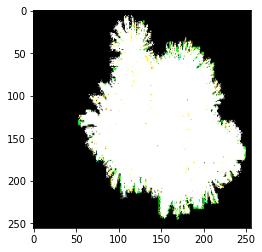

In [45]:
import matplotlib.pyplot as plt
plt.imshow(i[0][0]) #  뭔지 모른다

# 범위에 벗어나서 Clipping

In [77]:
for i in tr3.take(1):
    print(i[0][0].numpy())  # float가 나옴(dtype 확인하기)
    print(i[0][0].numpy().dtype)
    print(i[0][0].numpy().shape)

[[[ 46.600113    92.55324    160.55324   ]
  [ 47.51323     94.51323    162.51323   ]
  [ 49.382812    96.38281    165.32925   ]
  ...
  [ 36.35855     38.52678      0.        ]
  [ 37.22026     38.853516     0.        ]
  [ 37.446762    39.446762     0.44676208]]

 [[ 47.2563      93.20943    161.20943   ]
  [ 48.188828    95.18883    163.56648   ]
  [ 49.654037    96.65404    166.65404   ]
  ...
  [ 32.990753    37.39232      0.        ]
  [ 34.492813    37.37172      0.        ]
  [ 35.472214    38.790573     0.        ]]

 [[ 48.25586     94.208984   162.20898   ]
  [ 49.16211     96.16211    165.02148   ]
  [ 50.28038     97.28038    167.28038   ]
  ...
  [ 28.419922    35.152344     0.45204163]
  [ 30.373047    35.83789      0.        ]
  [ 31.709549    36.675217     0.        ]]

 ...

 [[ 69.208984   117.208984   192.67383   ]
  [ 69.697266   118.42969    194.42969   ]
  [ 71.54796    120.28038    196.28038   ]
  ...
  [ 61.73242    109.73242    181.73242   ]
  [ 60.31224    10

tf.Tensor(1, shape=(), dtype=int32)


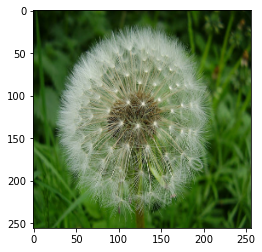

In [82]:
for i in tr3.take(1):
    plt.imshow(i[0][0].numpy().astype('uint8')) # uint8로 해줘야 함.
    print(i[1][0])

In [114]:
tr4 = tr3.cache().shuffle(1000).prefetch(tf.data.experimental.AUTOTUNE)

In [2]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape=(256,256,3)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(5)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [118]:
%time model.fit(tr4,epochs=1) # 엄청 오래 걸림.....

115/115 [==============================] - 114s 995ms/step - loss: 24.6765 - accuracy: 0.2586
Wall time: 1min 56s


In [ ]:
%time model.fit(tf.keras.preprocessing.image_dataset_from_directory(data_dir),epochs=1)

Found 3670 files belonging to 5 classes.


augmentation을 위해 이 작업을 하는 중!

<br></br>

## 데이터 관리

tensor 데이터 활용

- primary
    - directory : 편함
    - pandas : 편함 + EDA
- secondary
    - db : 
    - hdf5

In [86]:
data = pathlib.Path(data_dir)
len(list(data.glob('*/*.jpg')))

3670

In [87]:
files = list(data.glob('*/*.jpg'))
#특정 파일 포맷 찾는 glob

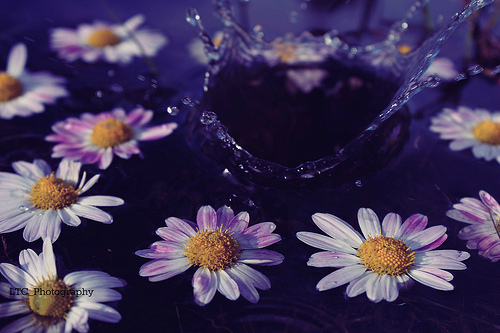

In [88]:
from PIL import Image
Image.open(files[3])

In [89]:
trd = tf.keras.preprocessing.image_dataset_from_directory(data, batch_size=32)
trd.class_names

# default  image_size=(256, 256)
# 크면 resize, 작으면 zero padding

Found 3670 files belonging to 5 classes.


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [91]:
list(trd.take(1))[0][1]
# generator -> list

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([3, 0, 1, 3, 1, 4, 0, 1, 0, 3, 3, 4, 1, 3, 4, 0, 0, 2, 4, 0, 1, 4,
       2, 1, 2, 3, 3, 2, 4, 4, 1, 0])>

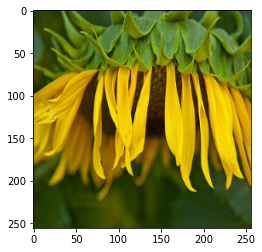

In [93]:
plt.imshow(list(trd.take(1))[0][0].numpy().astype('uint8')[0])
# resize 된거라 왜곡되는 문제점이 있다.

위의 방법은 전처리를 해줘야 함.

<br></br>

### ImageDataGenerator 활용
- 편하게 처리할 수 있음
- 최근에 나온 것


tf.data +ImageDataGenerator 둘다 해야함

In [94]:
imger = tf.keras.preprocessing.image.ImageDataGenerator()
temp = imger.flow_from_directory(data)

Found 3670 images belonging to 5 classes.


In [95]:
temp

numpy로 할 것인지 tensor로 할 것인지
tf.data.Dataset.from_generator

In [ ]:
next( imger.flow_from_directory(data) ) #규칙에 따라 augmentaion한것 보여준다